In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
import xarray as xr
import os
import sys
import importlib
sys.path.append('/Users/eddifying/Cloudfree/gitlab-cloudfree/gyre_wind')
from gyre_wind import tools, plotters, readers

import importlib

# Load Dinezio time series

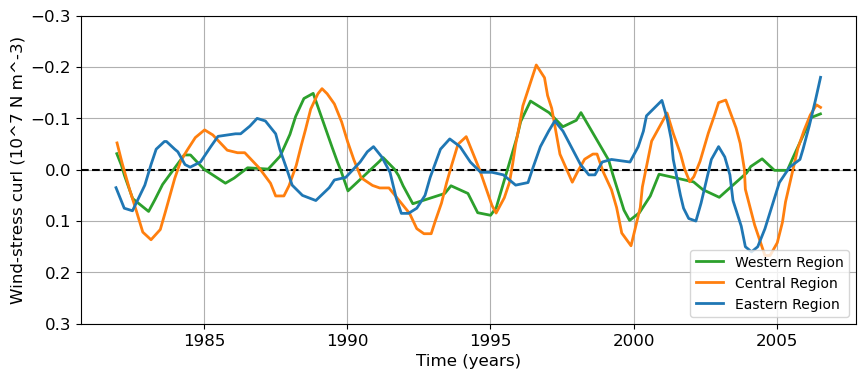

In [2]:
path_to_dinezio = '/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/forCristina_202409/data/external_data/'
path_to_dinezio = '/Users/eddifying/Dropbox/Public/forCristina_202409/data/external_data/'
ds_east, ds_central, ds_west = readers.load_dinezio(path_to_dinezio)

# Define linestyles using cycler 
plotters.plot_wind_stress_curl(ds_east, ds_central, ds_west)

# Load Florida Current

/Users/eddifying/Cloudfree/gitlab-cloudfree/gyre_wind/gyre_wind/readers.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fc_dates = pd.date_range(start=start_date, periods=len(fc_time), freq='M')


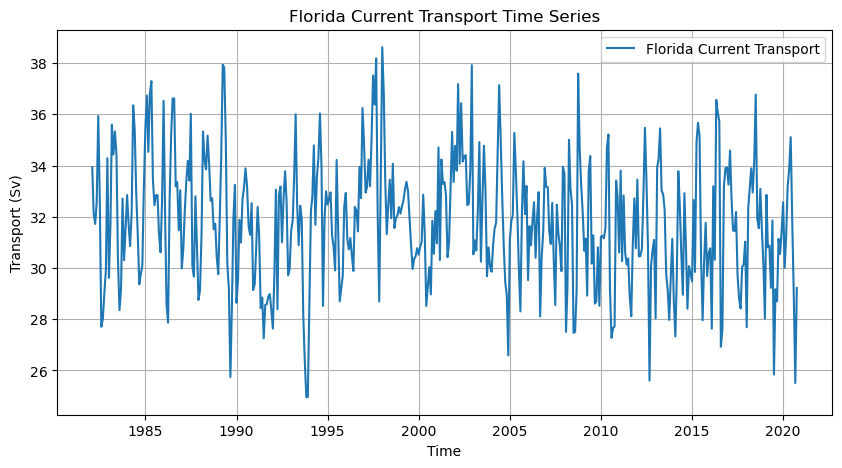

In [3]:
# Example usage
input_dir = '/Users/eddifying/Dropbox/Public/forCristina_202409/data/interim_data/'
ds_fc = readers.load_florida_current_data(input_dir)

# Plot time series of Florida Current transport
plt.figure(figsize=(10, 5))
plt.plot(ds_fc.time, ds_fc.transport, label='Florida Current Transport')
plt.xlabel('Time')
plt.ylabel('Transport (Sv)')
plt.title('Florida Current Transport Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#input_dir = '/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/#Data/FloridaCurrent/'
#fname = 'Florida_Current_Transport_1982_to_Present.mat'
#ds_fc_full = readers.load_fc_full(input_dir, fname)

#ds_fc_monthly = tools.process_fc_data(ds_fc_full)

# Save the dataset to a NetCDF file
#ds_fc_monthly.to_netcdf(os.path.join(data_dir, 'fc_transports.nc'))

## Load AC & gyre 


In [5]:
input_dir = '../data'
ac_trans = xr.open_dataset(os.path.join(input_dir,'ac_gyre_trans_2023.nc'))
ac_trans

<xarray.Dataset> Size: 882kB
Dimensions:                        (ac_dates: 13792,
                                    integrated_ac_trans_corrected: 13792,
                                    dim_0: 13792, Date: 13769)
Coordinates:
  * ac_dates                       (ac_dates) datetime64[ns] 110kB 2004-03-29...
  * integrated_ac_trans_corrected  (integrated_ac_trans_corrected) float64 110kB ...
  * dim_0                          (dim_0) int64 110kB 0 1 2 ... 13790 13791
  * Date                           (Date) datetime64[ns] 110kB 2004-04-07 ......
Data variables:
    ac_trans_tukey_18months        (dim_0) float64 110kB ...
    gyre_series.index              (Date) datetime64[ns] 110kB ...
    gyre_series                    (Date) float64 110kB ...
    gyre_trans_tukey_18months      (Date) float64 110kB ...

## Load MOC from RAPID

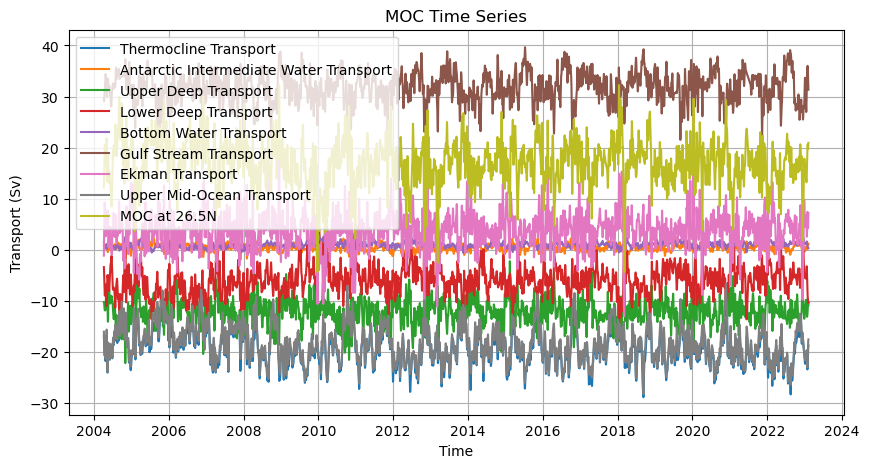

<xarray.Dataset> Size: 1MB
Dimensions:       (time: 13779)
Coordinates:
  * time          (time) datetime64[ns] 110kB 2004-04-02 ... 2023-02-11
Data variables:
    t_therm10     (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_aiw10       (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_ud10        (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_ld10        (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_bw10        (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_gs10        (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_ek10        (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    t_umo10       (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
    moc_mar_hc10  (time) float64 110kB nan nan nan nan nan ... nan nan nan nan
Attributes:
    Title:                         RAPID MOC timeseries
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/
    Acknowledgement:               The RAPID-MOC monitoring project is funded...
    Created_by:                    Ben Moat
    Creation_date:                 17-Sep-2024
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/223b34a32dc5c945e0637086abc0f...

In [6]:
importlib.reload(plotters)
# Load MOC time series
input_dir = '../data'
ds_moc = xr.open_dataset(os.path.join(input_dir,'moc_transports.nc'))

plotters.moc_full(ds_moc)
ds_moc


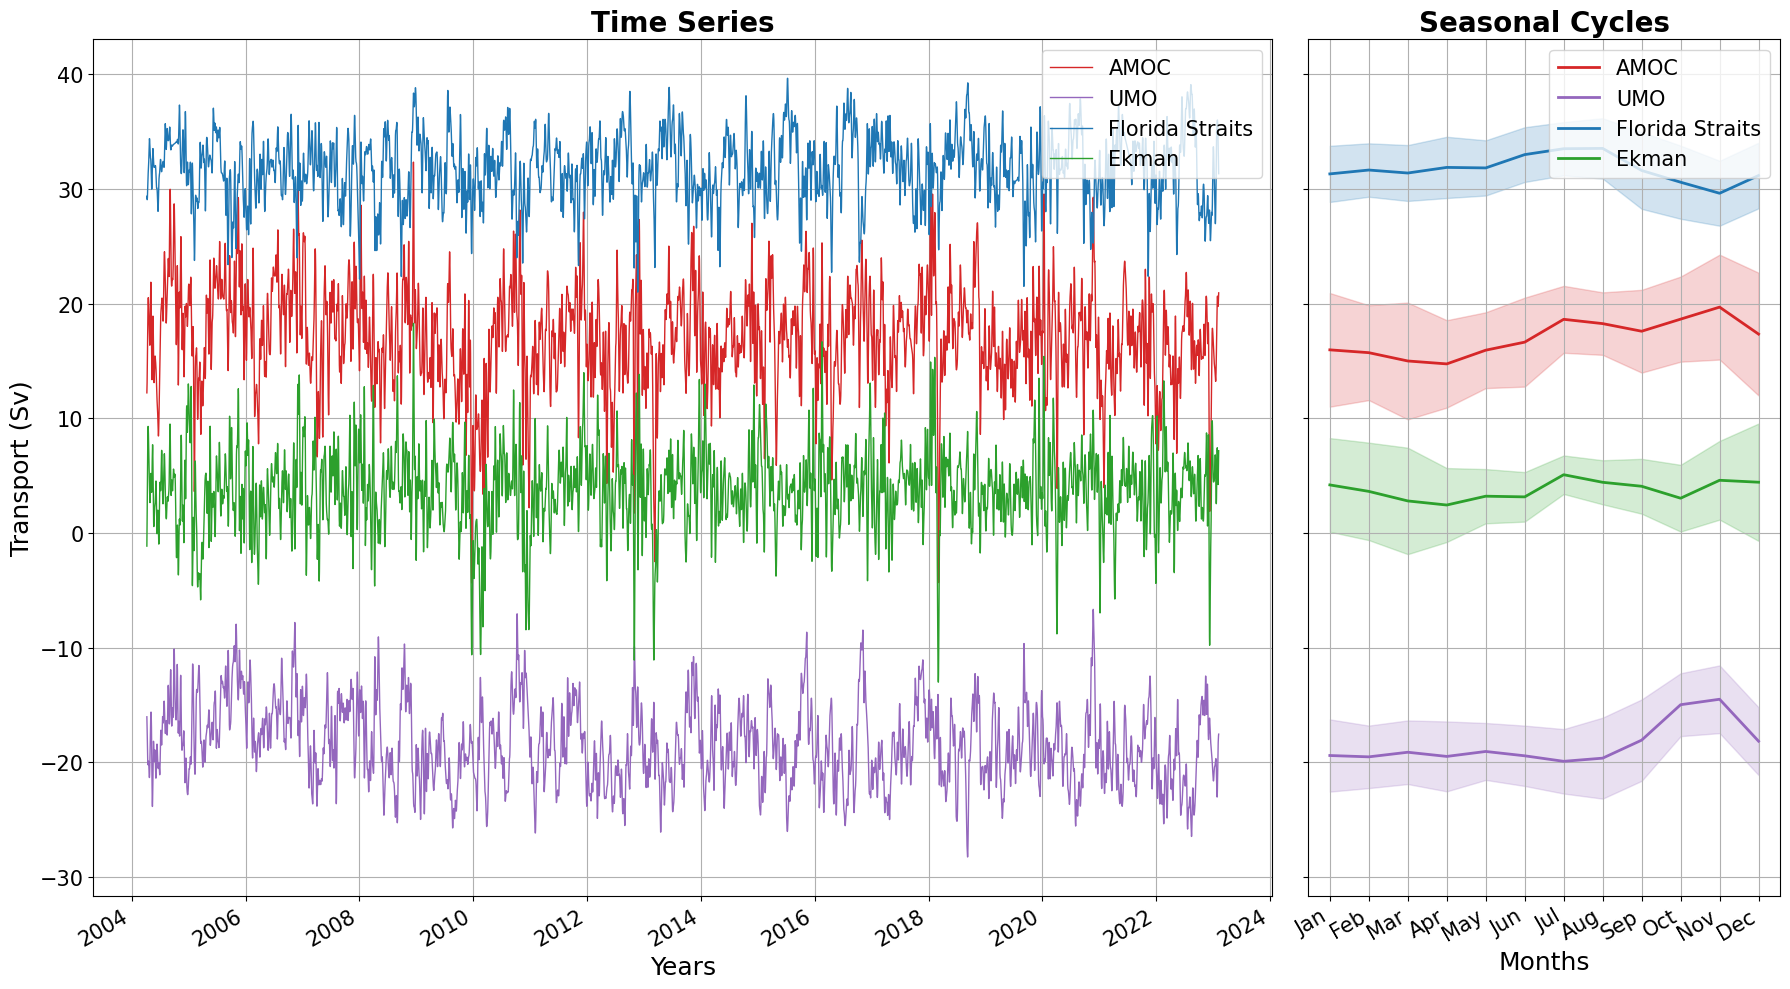

In [7]:
# Compute the seasonal cycle
seasonal_cycle_moc, seasonal_std_moc = tools.compute_seasonal_cycle(ds_moc)

# Call the function
plotters.moc_seasonal(ds_moc, seasonal_cycle_moc, seasonal_std_moc)

# Load ERA5

In [8]:
# Use the function to load the data
input_dir_u = '/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/u_component/'
input_dir_v = '/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/v_component/'

# Load daily data and convert longitudes
u10_daily = readers.load_daily_data(input_dir, 'daily_mean_u_wind_data_1979_2023.nc')
v10_daily = readers.load_daily_data(input_dir, 'daily_mean_v_wind_data_1979_2023.nc')

# Calculate monthly means
u10_monthly = tools.create_monthly_means(u10_daily)
v10_monthly = tools.create_monthly_means(v10_daily)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/eddifying/Cloudfree/gitlab-cloudfree/gyre_wind/data/daily_mean_u_wind_data_1979_2023.nc'

## Calculate wind stress curl (regions))

Using the u10 winds, calculates the stress with a constant drag coefficient and density of air, then calculates the curl using a `differentiate` function with respect to longitude and latitude.

In [ ]:
# Compute wind stress curl
curl_tau = tools.compute_wind_stress_curl(u10_monthly.u10, v10_monthly.v10)

# Average over all latitudes 29N-24N
curl_tau_lat_avg = curl_tau.mean(dim='latitude')

# Subset into the three longitude regions
full_region = curl_tau_lat_avg.sel(longitude=slice(-77, -17)).mean(dim='longitude')
region_1 = curl_tau_lat_avg.sel(longitude=slice(-77, -57)).mean(dim='longitude')
region_2 = curl_tau_lat_avg.sel(longitude=slice(-57, -37)).mean(dim='longitude')
region_3 = curl_tau_lat_avg.sel(longitude=slice(-37, -17)).mean(dim='longitude')

# Create an xarray dataset with the three regions
ds_curl = xr.Dataset({'full_region': full_region, 'region_1': region_1, 'region_2': region_2, 'region_3': region_3})

ds_curl.to_netcdf(os.path.join(data_dir, 'curl_tau.nc'))

## Calculate Sverdrup, Ekman and geostrophic Sverdrup transport

In [ ]:

# Compute the transports
V_sv, V_ek, V_g = compute_transports(curl_tau_lat_avg, u10_monthly.latitude)

# Integrade over the longitude 
# Note from Eleanor: Should this be a sum or an integration?
V_sv_time = V_sv.sum(dim='longitude')/1e9  # Final Sverdrup transport as a function of time
V_ek_time = V_ek.sum(dim='longitude')/1e3 #Final Ekaman contribution to Sverdrup transport
V_g_time = V_g.sum(dim='longitude') #Final Geostrophic contribution to Sverdrup Transport

# Load SSHA data

In [ ]:
# SSHA
file_path='/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/SSH/sla/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1720009044284.nc'
ds=xr.open_dataset(file_path)
ssh=ds['sla']#adt sla
lat_values=ds['latitude']

# Compute the latitudinal average between 29ºN and 24ºN 
ssh_avg=ssh.mean(dim='latitude')

# Compute mean SSH over time for the latitudinally averaged data
mean_ssh=ssh_avg.mean(dim='time')

# Compute SSHA 
ssha=ssh_avg-mean_ssh

In [ ]:
# Remove global mean sea level rise (about 21 cm) from SSHA
gmsl_file_path='/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/GlobalMeanSL_Rise/omi_climate_sl_global_area_averaged_anomalies_19930101_P20240228.nc'
gmsl_ds=xr.open_dataset(gmsl_file_path)
gmsl=gmsl_ds['MSL_filtered_GIA_TPA_corrected_adjusted']
#print(gmsl)
#print(ssha) #they have the same time variable

# Remove GMSL (/100 from cm to m) from the SSHA
ssha_corrected=ssha-gmsl/100

# Compute the zonal mean (mean across all longitudes) at each time step
zonal_mean = ssha_corrected.mean(dim='longitude')

# Subtract the zonal mean from the SSHA to remove the seasonal cycle
ssha_deseasonalized = ssha_corrected - zonal_mean